# binding affinity analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st 

## docking energy（HPEPDOCK）

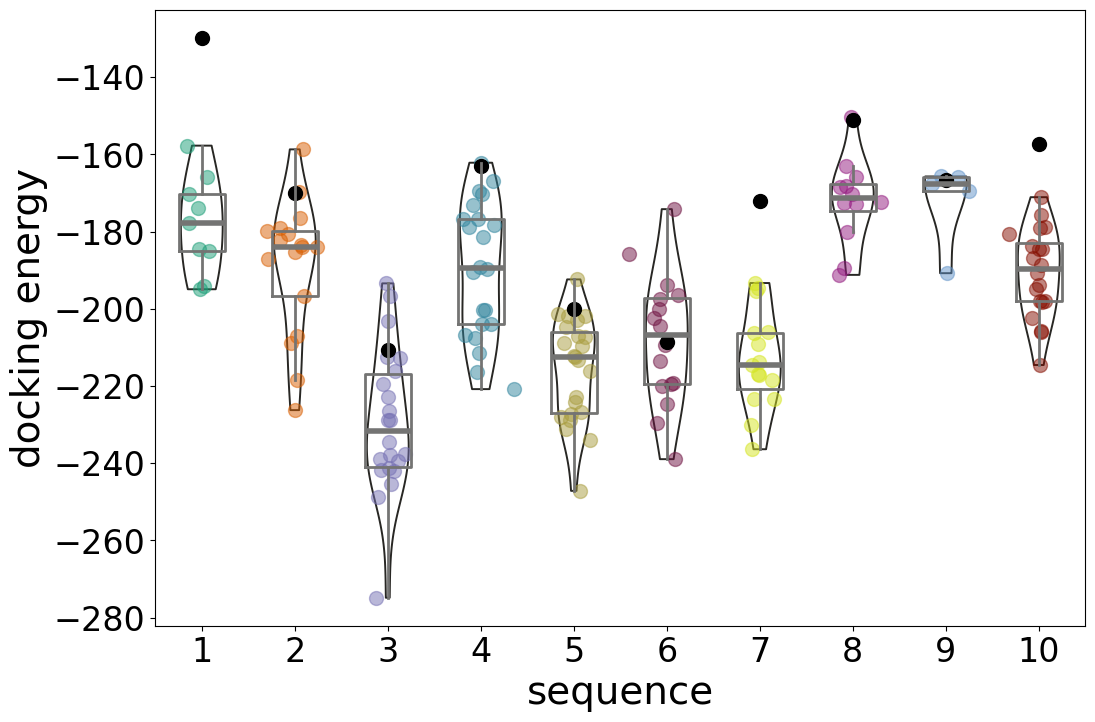

In [2]:
y_data = []
a = np.array([-170.280, -157.753, -184.493, -184.930, -177.777, -194.947, -173.903, -193.983, -165.824])
b = np.array([-218.429, -185.314, -176.517, -196.805, -206.956, -226.253, -208.923, -184.119, -158.721, -183.978, -178.958, -182.307, -187.137, -179.815, -183.403, -180.626, -169.823])
c = np.array([-222.982, -237.624, -241.745, -238.991, -241.353, -237.907, -228.794, -248.860, -239.455, -212.466, -228.897, -234.612, -242.119, -196.728, -193.429, -203.248, -219.500, -212.755, -216.077, -245.372, -274.841, -226.454])
d = np.array([-181.396, -206.851, -189.230, -216.412, -190.421, -211.559, -203.894, -207.471, -189.811, -178.756, -162.177, -200.226, -200.344, -176.860, -204.074, -176.634, -173.252, -220.814, -170.341, -178.246, -166.830, -169.509])
e = np.array([-192.398, -207.372, -227.136, -212.443, -207.132, -201.899, -201.306, -212.122, -202.983, -216.013, -204.809, -201.801, -224.213, -233.951, -222.793, -213.231, -208.766, -228.794, -227.980, -231.138, -226.742, -209.572, -247.165])
f = np.array([-185.912, -174.204, -197.586, -204.542, -229.670, -224.625, -213.510, -193.726, -219.410, -200.169, -209.301, -202.390, -196.505, -219.229, -220.000, -238.954])
g = np.array([-193.339, -206.122, -206.239, -223.340, -214.538, -223.392, -217.097, -213.674, -230.125, -195.526, -194.667, -216.894, -236.382, -209.208, -218.353])
h = np.array([-170.324, -165.963, -180.164, -189.549, -191.226, -172.658, -172.818, -172.318, -163.020, -168.298, -168.454, -150.224])
i = np.array([-165.925, -169.628, -190.787, -167.687, -165.737])
j = np.array([-188.566, -214.570, -205.69, -190.808, -197.914, -180.619, -175.675, -202.463, -178.859, -206.017, -183.861, -194.844, -186.935, -171.107, -193.785, -184.507, -178.988, -198.082, -198.159, -184.581])
y_data.append(a)
y_data.append(b)
y_data.append(c)
y_data.append(d)
y_data.append(e)
y_data.append(f)
y_data.append(g)
y_data.append(h)
y_data.append(i)
y_data.append(j)

jitter = 0.08
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
x_jittered

# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3", "#30849D", "#A99D3F", "#6F1342", "#D5E521", "#931B7F", "#6193C8", "#850e00"]

# Horizontal positions for the violins. 
POSITIONS = [0,1,2,3,4,5,6,7,8,9]


params = {
    'axes.labelsize': 24,
    'axes.titlesize':24,
    'font.size': 24, 
    'legend.fontsize': 24,
    'xtick.labelsize': 24, 
    'ytick.labelsize': 24,
}
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize= (12, 8))

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)
xlabels = ['1', '2', '3', '4', '5', '6', '7', '8', '9','10']
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels)
# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.5)
ax.scatter(0, -129.805, s = 100, color='#000000', alpha=1.0)
ax.scatter(1, -170.092, s = 100, color='#000000', alpha=1.0)
ax.scatter(2, -210.690, s = 100, color='#000000', alpha=1.0)
ax.scatter(3, -163.123, s = 100, color='#000000', alpha=1.0)
ax.scatter(4, -199.988, s = 100, color='#000000', alpha=1.0)
ax.scatter(5, -208.581, s = 100, color='#000000', alpha=1.0)
ax.scatter(6, -172.153, s = 100, color='#000000', alpha=1.0)
ax.scatter(7, -151.220, s = 100, color='#000000', alpha=1.0)
ax.scatter(8, -166.577, s = 100, color='#000000', alpha=1.0)
ax.scatter(9, -157.290, s = 100, color='#000000', alpha=1.0)
ax.set_ylabel('docking energy', size=28)
ax.set_xlabel('sequence', size=28)
fig.savefig('figure/docking_energy.pdf')

# Novelty and Improvement ratio

In [1]:
from Levenshtein import distance
import pandas as pd
import numpy as np

df = pd.read_csv('../results/PepZOO/affinity/result.csv',sep=',')
id_list = df['ID'].to_list()
seq_list = df['sequence'].to_list()
binding_list = df['affinity'].to_list()

origin_seq_list = []
origin_binding_list = []
opt_seq_list = [[''] * 10 for i in range(40)]
opt_binding_list = np.zeros((40,10))

for i in range(10):
    origin_seq_list.append(seq_list[i])
    origin_binding_list.append(binding_list[i])

novelty_list = []
better_list = []

for i in range(40):
    for j in range(10):
        opt_seq_list[i][j] = seq_list[10*(i+1)+j]
        opt_binding_list[i][j] = binding_list[10*(i+1)+j]

for i in range(40):
    k = 0
    count = 0
    temp_dist = 0
    for j in range(10):
        temp_dist = temp_dist + distance(origin_seq_list[j], opt_seq_list[i][j])
        k = k + 1
        if opt_binding_list[i][j] > origin_binding_list[j]:
            count = count + 1

    temp_dist = temp_dist / float(k)
    novelty_list.append(temp_dist)
    better_list.append(count / 10.0)

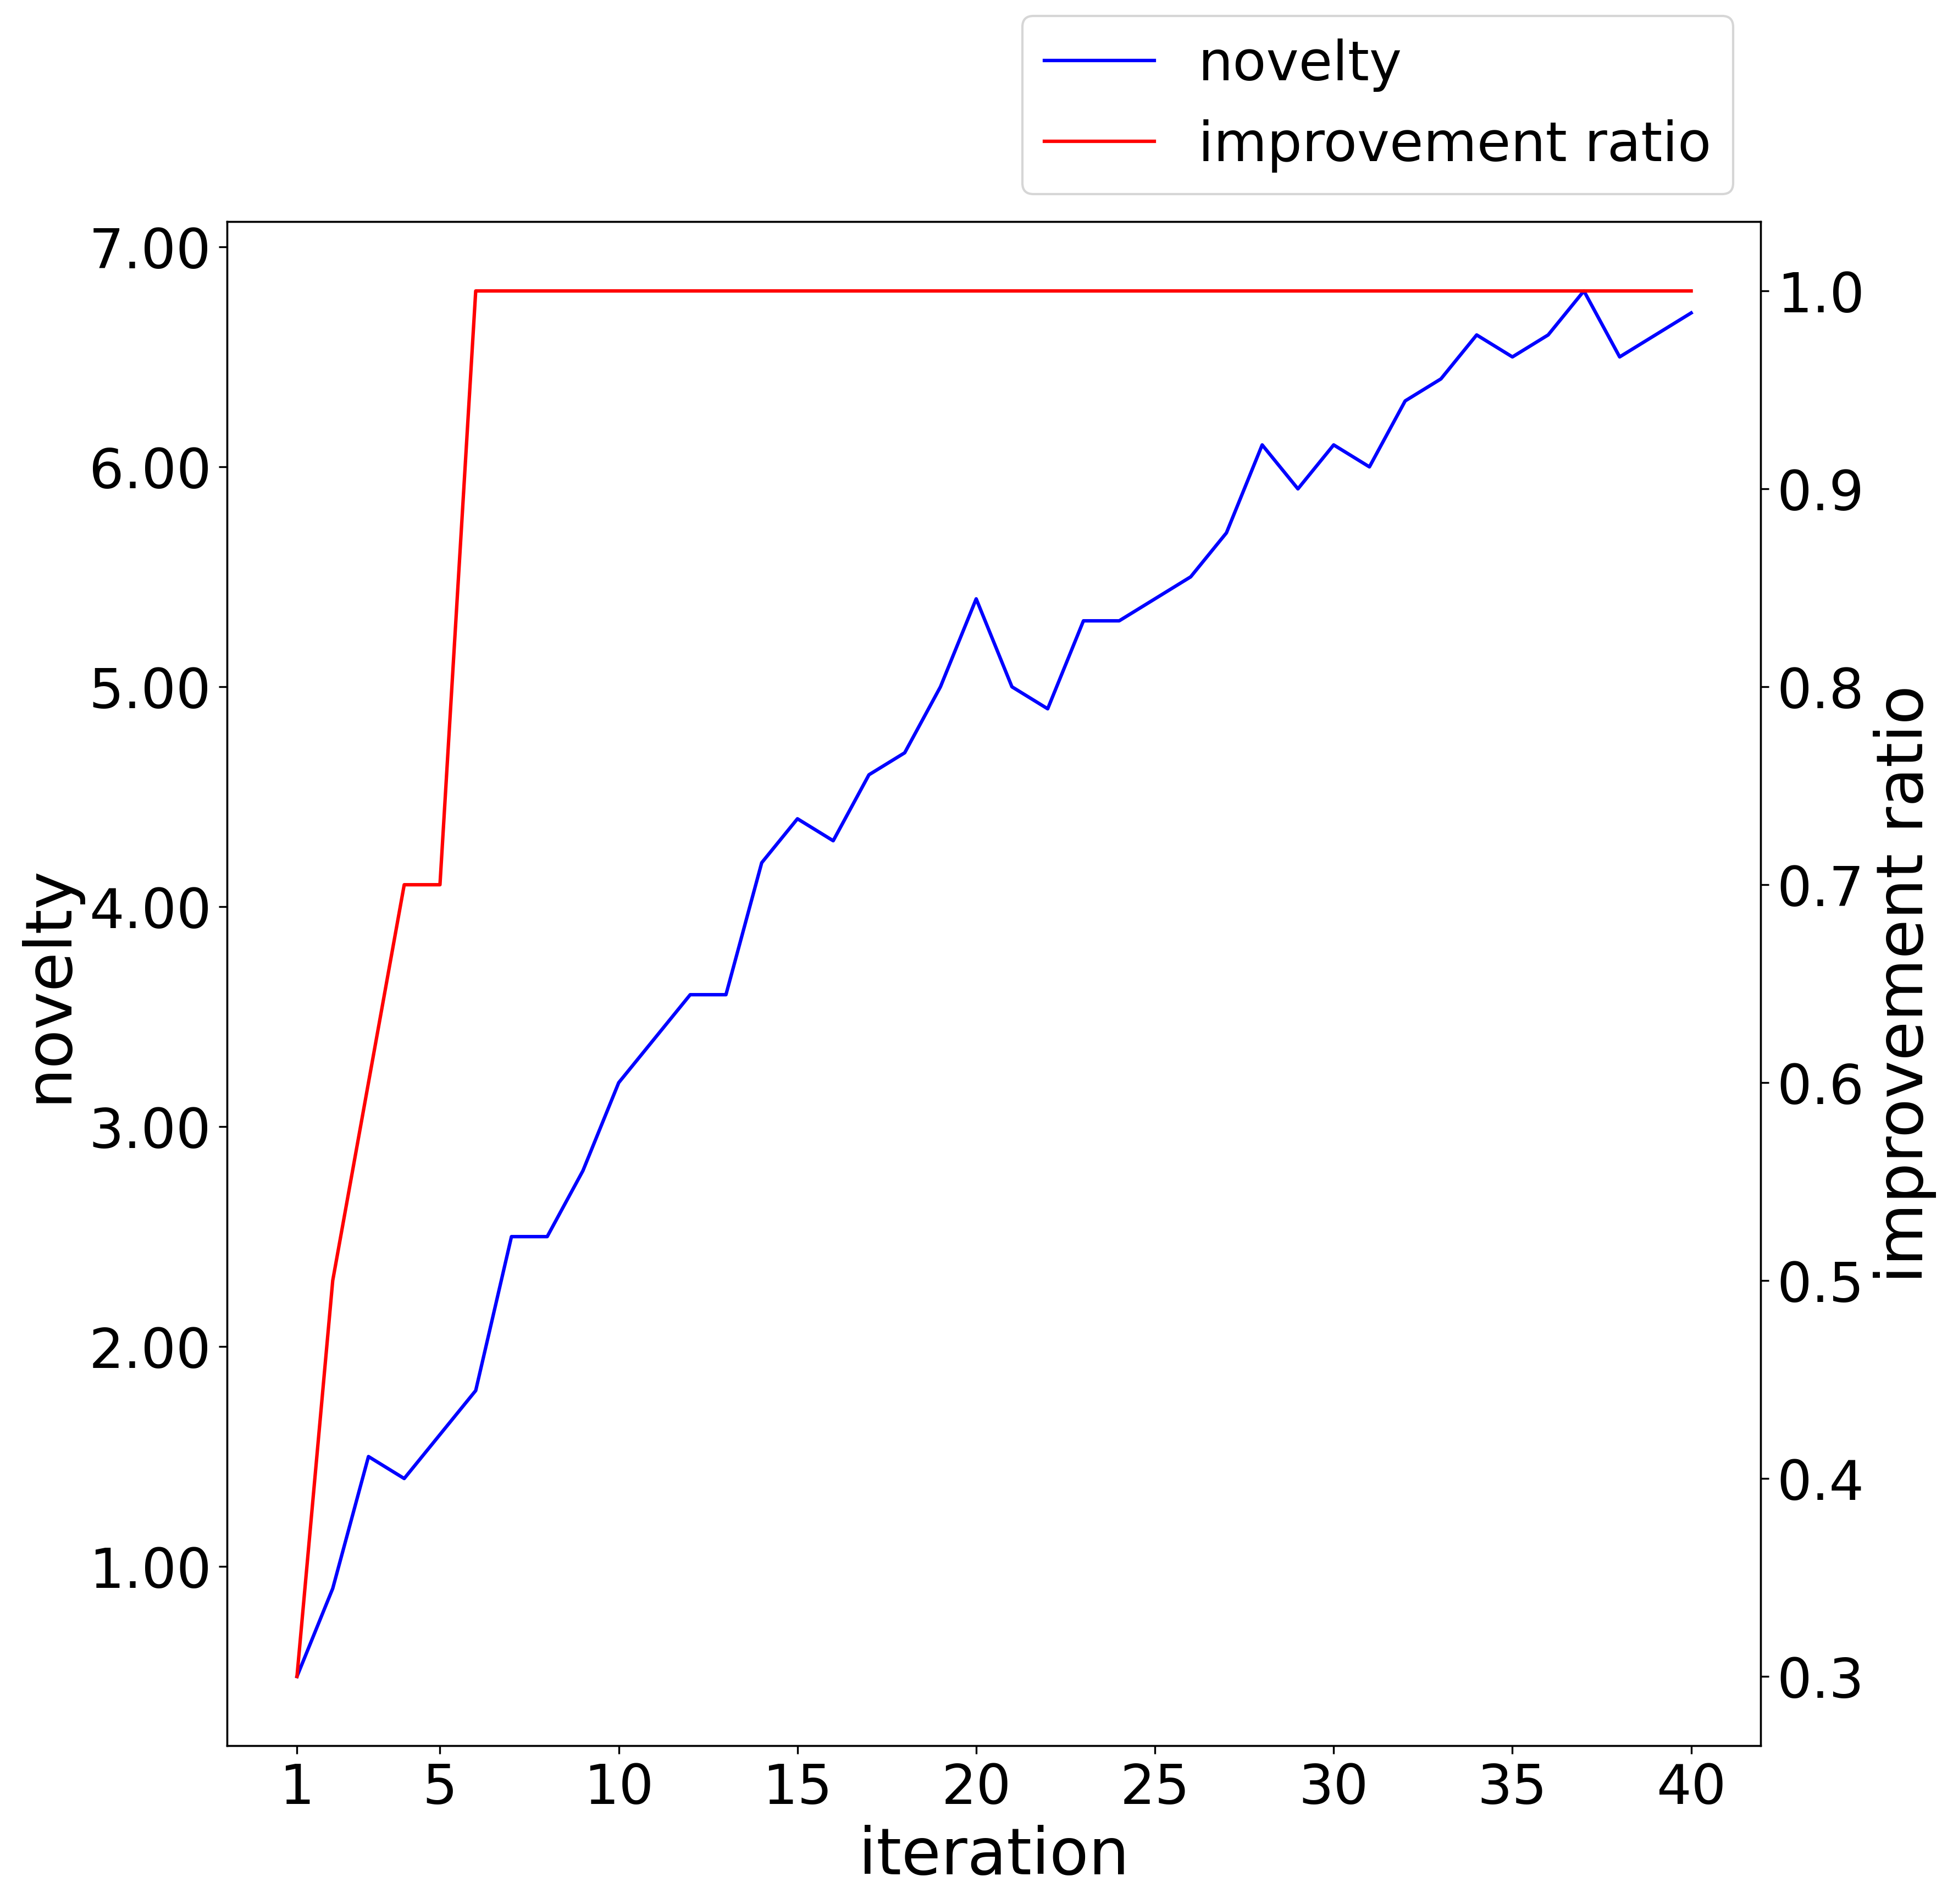

In [3]:
import numpy as np
import matplotlib.pyplot as plt
params = {
    'axes.labelsize': 24,
    'axes.titlesize':24,
    'font.size': 24, 
    'legend.fontsize': 24,
    'xtick.labelsize': 24, 
    'ytick.labelsize': 24,
}
plt.rcParams.update(params)

# plt.rcParams['font.size'] = 36
# plt.tick_params(labelsize=36)
x = np.linspace(start = 0,stop = 39, num=40)

# y1 = list(map(float, y1))
# y2 = list(map(float, y2))
fig = plt.figure(figsize=(12,12),dpi=300)
ax = fig.add_subplot(111)
ax.plot(x,novelty_list[:40], '-', label = 'novelty', color='blue')

ax.yaxis.set_major_formatter('{:.2f}'.format)
ax2 = ax.twinx()
ax2.plot(x,better_list[:40], '-r', label = 'improvement ratio', color='red')
fig.legend(loc=4, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
ax.set_xticks([0,4,9,14,19,24,29,34,39])
ax.set_xticklabels(['1','5','10','15','20','25','30','35','40'])
ax.set_xlabel("iteration", fontsize=28)
ax.set_ylabel(r"novelty", fontsize=28)
ax2.set_ylabel(r"improvement ratio",fontsize=28)
plt.savefig(f'figure/affinity_novelty-improvement.pdf')